### Lab Exercise 3 : Build Simple Deep Learning Model

1.	Follow the steps for a simple deep learning model
    i.	Load a small dataset of any application of your choice. 
    ii.	Split the dataset with 80% training and 20% testing sets.
    iii.	Visualize some samples from the dataset with their corresponding labels.
    iv.	Implement the LeNet neural network architecture by initializing the weights and biases.
    v.	Use a cross-entropy loss function suitable for classification tasks.
    vi.	Select an optimizer like SGD or Adam to train the model.
    vii.	Train the model on the training set.
    viii.	Monitor the training loss and accuracy after each epoch.
    ix.	Evaluate the model on the test set.
    x.	Report the accuracy and loss on the test data.
2.	Repeat the above steps by experimenting with different learning rates, batch sizes, and the number of neurons in the hidden layer. Observe how these changes affect the model's performance.
3.	Implement techniques like dropout or L2 regularization to prevent overfitting. Compare the performance with and without regularization.
4.	Plot the training and validation accuracy/loss over epochs and visualize the confusion matrix of the test results.



(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


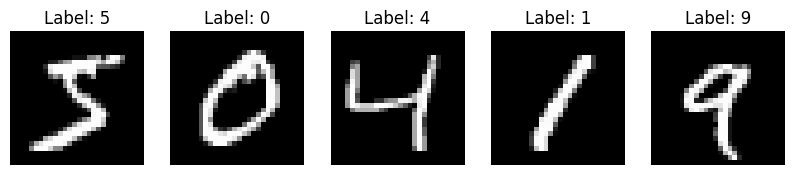

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7605 - loss: 0.7485 - val_accuracy: 0.9703 - val_loss: 0.0973
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9564 - loss: 0.1435 - val_accuracy: 0.9809 - val_loss: 0.0620
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9701 - loss: 0.1013 - val_accuracy: 0.9837 - val_loss: 0.0549
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9761 - loss: 0.0787 - val_accuracy: 0.9862 - val_loss: 0.0455
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9786 - loss: 0.0667 - val_accuracy: 0.9845 - val_loss: 0.0474
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9831 - loss: 0.0566 - val_accuracy: 0.9861 - val_loss: 0.0510
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9835 - loss: 0.0562 - val_accuracy: 0.9880 - val_loss: 0.0440
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9849 - loss: 0.0514 - val_accuracy: 0.

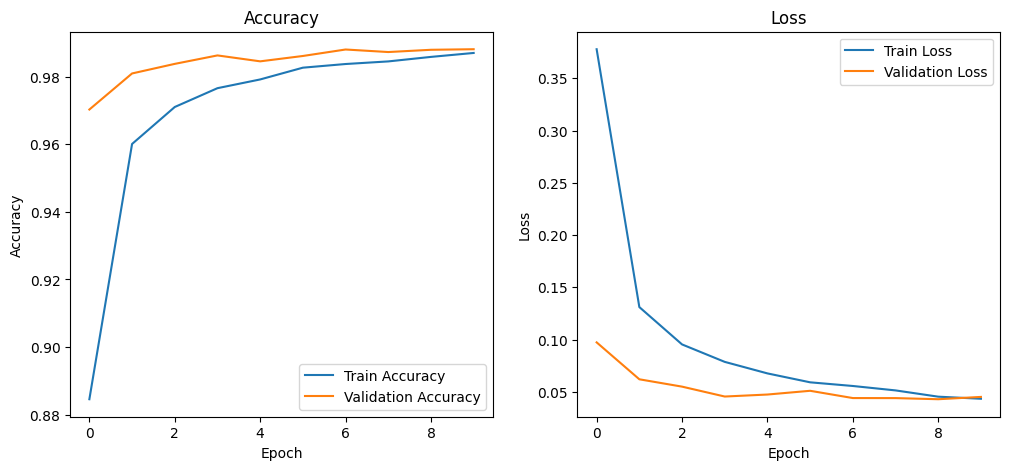

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9858 - loss: 0.0431
Test accuracy: 0.9890000224113464
Test loss: 0.03400115296244621
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


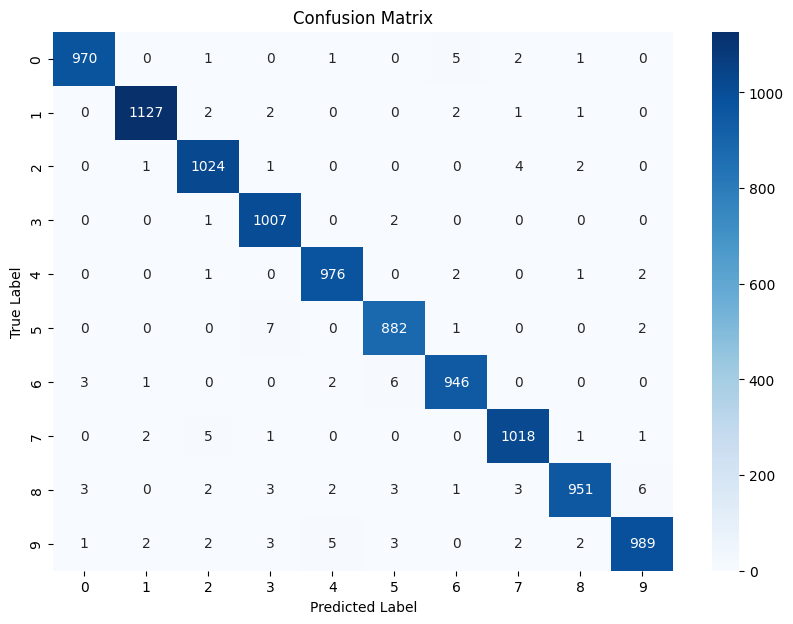

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix


(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape)
print(x_test.shape)

def plot_samples(images, labels, num_samples=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.show()

plot_samples(x_train, y_train)

def create_lenet_with_dropout_model():
    model = Sequential([
        Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(16, (5, 5), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(120, activation='relu'),
        
        Dropout(0.5), 
        Dense(84, activation='relu'),
        Dense(10, activation='softmax') 
    ])
    return model


model = create_lenet_with_dropout_model()


model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])



history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=64, 
                    validation_split=0.2)


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

y_pred = np.argmax(model.predict(x_test), axis=-1)


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
